In [361]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

import warnings
warnings.filterwarnings('ignore')

## **MINI PROJECT : TIME SERIES FORECASTING MENGGUNAKAN ARIMA UNTUK MEMPREDIKSI HARGA SAHAM, APAKAH AKURAT?**

**Context**

Pada mini project ini akan mencoba melakukan pembuktian prediksi harga saham menggunakan bantuan Time Series Forecasting model ARIMA, tujuan dilakukan nya mini project ini adalah untuk membuktikan apakah hasil prediksi akan akurat atau malah cenderung gagal memprediksi pergerakan harga saham, setelah itu akan dilakukan juga perbandingan saat menggunakan sedikit data historis harga saham dengan saat menggunakan banyak data historis harga saham, apakah banyaknya data akan berpengaruh signifikan terhadap performa model. Pada mini project ini akan digunakan data historis harga saham Bank Tabungan Pensiunan Syariah (BTPS) yang bisa didapatkan dari yahoo finance di link [berikut](https://finance.yahoo.com/quote/BTPS.JK/history?p=BTPS.JK) .

**Load Dataset Historis Harga Saham Bank Tabungan Pensiunan Syariah (BTPS) 11 Aug 2022 - 11 Aug 2023 (Sedikit Data)**

In [362]:
df_btps = pd.read_csv("BTPS.JK.csv")
df_btps

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-08-11,2860.0,3070.0,2860.0,3020.0,2893.022705,10584000
1,2022-08-12,3030.0,3070.0,2990.0,3030.0,2902.602295,3133800
2,2022-08-15,3030.0,3050.0,2960.0,3030.0,2902.602295,2113700
3,2022-08-16,3020.0,3030.0,2970.0,3020.0,2893.022705,2568500
4,2022-08-18,3050.0,3050.0,2970.0,2990.0,2864.283936,1595100
...,...,...,...,...,...,...,...
239,2023-08-07,2100.0,2130.0,2090.0,2110.0,2110.000000,10010100
240,2023-08-08,2120.0,2180.0,2110.0,2160.0,2160.000000,10886100
241,2023-08-09,2160.0,2180.0,2140.0,2150.0,2150.000000,12774500
242,2023-08-10,2150.0,2160.0,2130.0,2130.0,2130.000000,4855500


In [363]:
# mengecek missing values
df_btps.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

**Data Splitting**

In [364]:
# split data, dengan melakukan drop pada 40 data terakhir
df_btps_split = df_btps
for i in range(204,244):
    df_btps_split = df_btps_split.drop(i)

In [365]:
# data hasil splitting
df_btps_split

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-08-11,2860.0,3070.0,2860.0,3020.0,2893.022705,10584000
1,2022-08-12,3030.0,3070.0,2990.0,3030.0,2902.602295,3133800
2,2022-08-15,3030.0,3050.0,2960.0,3030.0,2902.602295,2113700
3,2022-08-16,3020.0,3030.0,2970.0,3020.0,2893.022705,2568500
4,2022-08-18,3050.0,3050.0,2970.0,2990.0,2864.283936,1595100
...,...,...,...,...,...,...,...
199,2023-06-06,1950.0,1950.0,1905.0,1925.0,1925.000000,24020500
200,2023-06-07,1950.0,1950.0,1865.0,1885.0,1885.000000,50055900
201,2023-06-08,1885.0,1935.0,1885.0,1900.0,1900.000000,29076600
202,2023-06-09,1900.0,1920.0,1890.0,1900.0,1900.000000,16352400


**Plot Data Awal Sebelum Splitting dengan Data Setelah Dilakukan Splitting** 

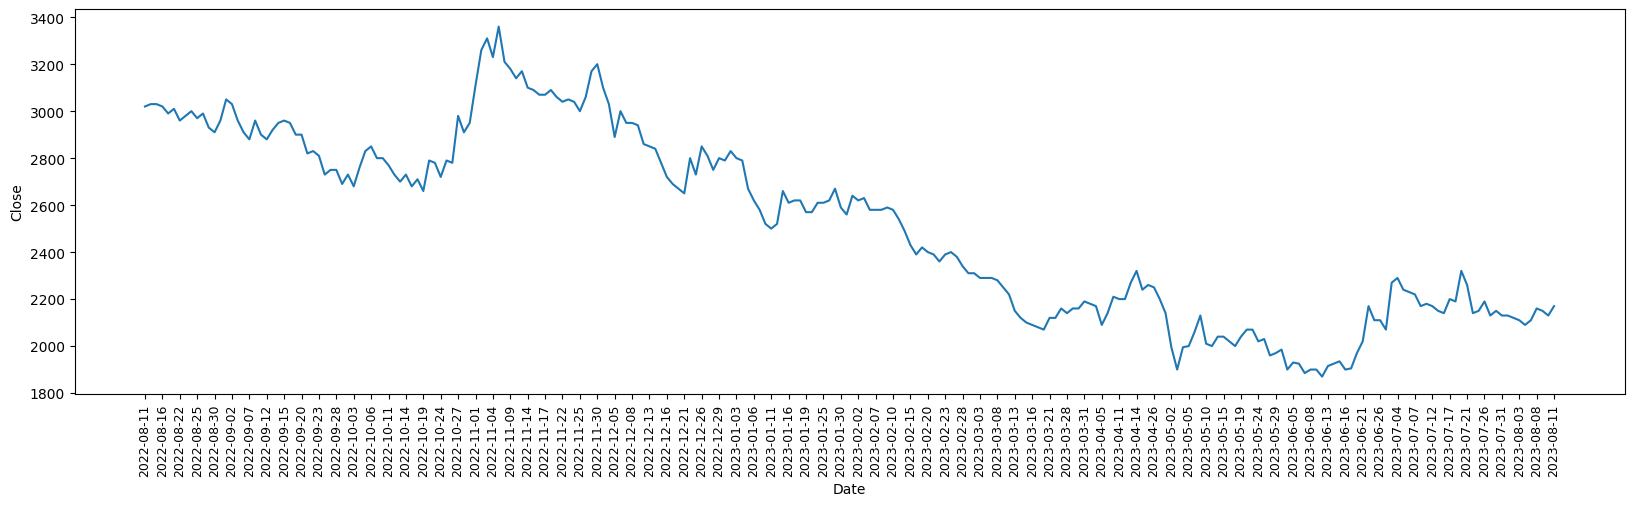

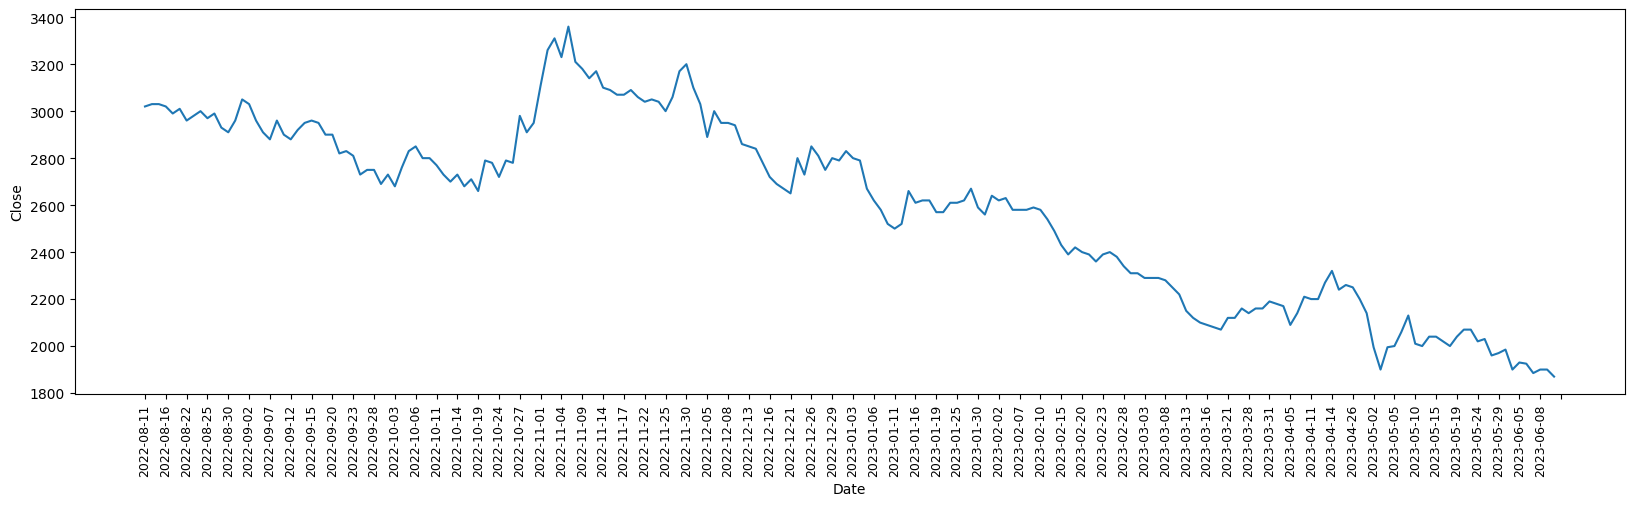

In [366]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df_btps, x='Date', y='Close')
plt.xticks(range(0,246,3), rotation=90, fontsize=9) 
plt.show()

plt.figure(figsize=(20,5))
sns.lineplot(data=df_btps_split, x='Date', y='Close')
plt.xticks(range(0,207,3), rotation=90, fontsize=9) 
plt.show()

**Cek Stationarity Menggunakan Adfuller Test**

Hypothesis
- Ho : data tidak stationer
- Ha : data stationer

In [367]:
pvalue = adfuller(df_btps_split['Close'])[1]

alpha = 0.05

if pvalue <= alpha:
    print('Reject null hypothesis, The data is stationary')
else:
    print('Failed to reject null hypothesis, The data is not stationary')

Failed to reject null hypothesis, The data is not stationary


**ACF-PACF**

Kita perlu untuk melakukan plot ACF-PACF dengan tujuan sebagaimana berikut :
- untuk menentukan data stationer atau tidak (Apabila grafik ACF slowly decaying, artinya data tidak stationer)
- untuk menentukan parameter ARIMA (p,d,q) terbaik

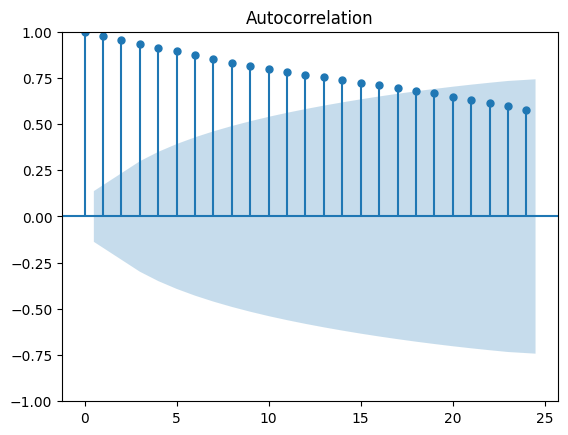

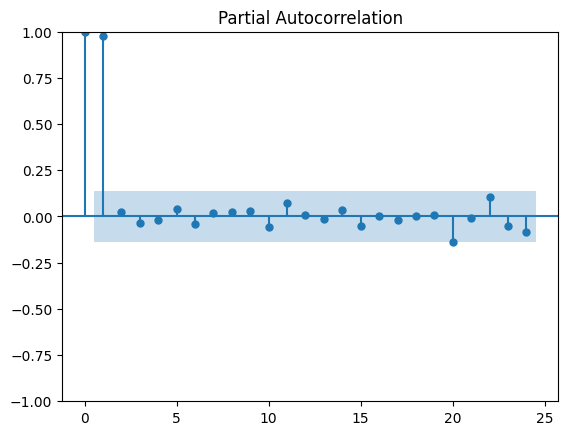

In [368]:
plot_acf(df_btps_split['Close'])
plt.show()

plot_pacf(df_btps_split['Close'])
plt.show()

Plot ACF menunjukkan kecenderungan slowly decaying, sehingga perlu dilakukan differencing.

**Differencing**

In [369]:
# membuat kolom baru berisikan nilai differencing 1
df_btps_split['diff1'] = df_btps_split['Close'].diff()
df_btps_split.head()

,Date,Open,High,Low,Close,Adj Close,Volume,diff1
0,2022-08-11,2860.0,3070.0,2860.0,3020.0,2893.022705,10584000,NaN
1,2022-08-12,3030.0,3070.0,2990.0,3030.0,2902.602295,3133800,10.0
2,2022-08-15,3030.0,3050.0,2960.0,3030.0,2902.602295,2113700,0.0
3,2022-08-16,3020.0,3030.0,2970.0,3020.0,2893.022705,2568500,-10.0
4,2022-08-18,3050.0,3050.0,2970.0,2990.0,2864.283936,1595100,-30.0


In [370]:
# membuat kolom baru berisikan nilai differencing 2
df_btps_split['diff2'] = df_btps_split['Close'].diff().diff()
df_btps_split.head()

,Date,Open,High,Low,Close,Adj Close,Volume,diff1,diff2
0,2022-08-11,2860.0,3070.0,2860.0,3020.0,2893.022705,10584000,NaN,NaN
1,2022-08-12,3030.0,3070.0,2990.0,3030.0,2902.602295,3133800,10.0,NaN
2,2022-08-15,3030.0,3050.0,2960.0,3030.0,2902.602295,2113700,0.0,-10.0
3,2022-08-16,3020.0,3030.0,2970.0,3020.0,2893.022705,2568500,-10.0,-10.0
4,2022-08-18,3050.0,3050.0,2970.0,2990.0,2864.283936,1595100,-30.0,-20.0


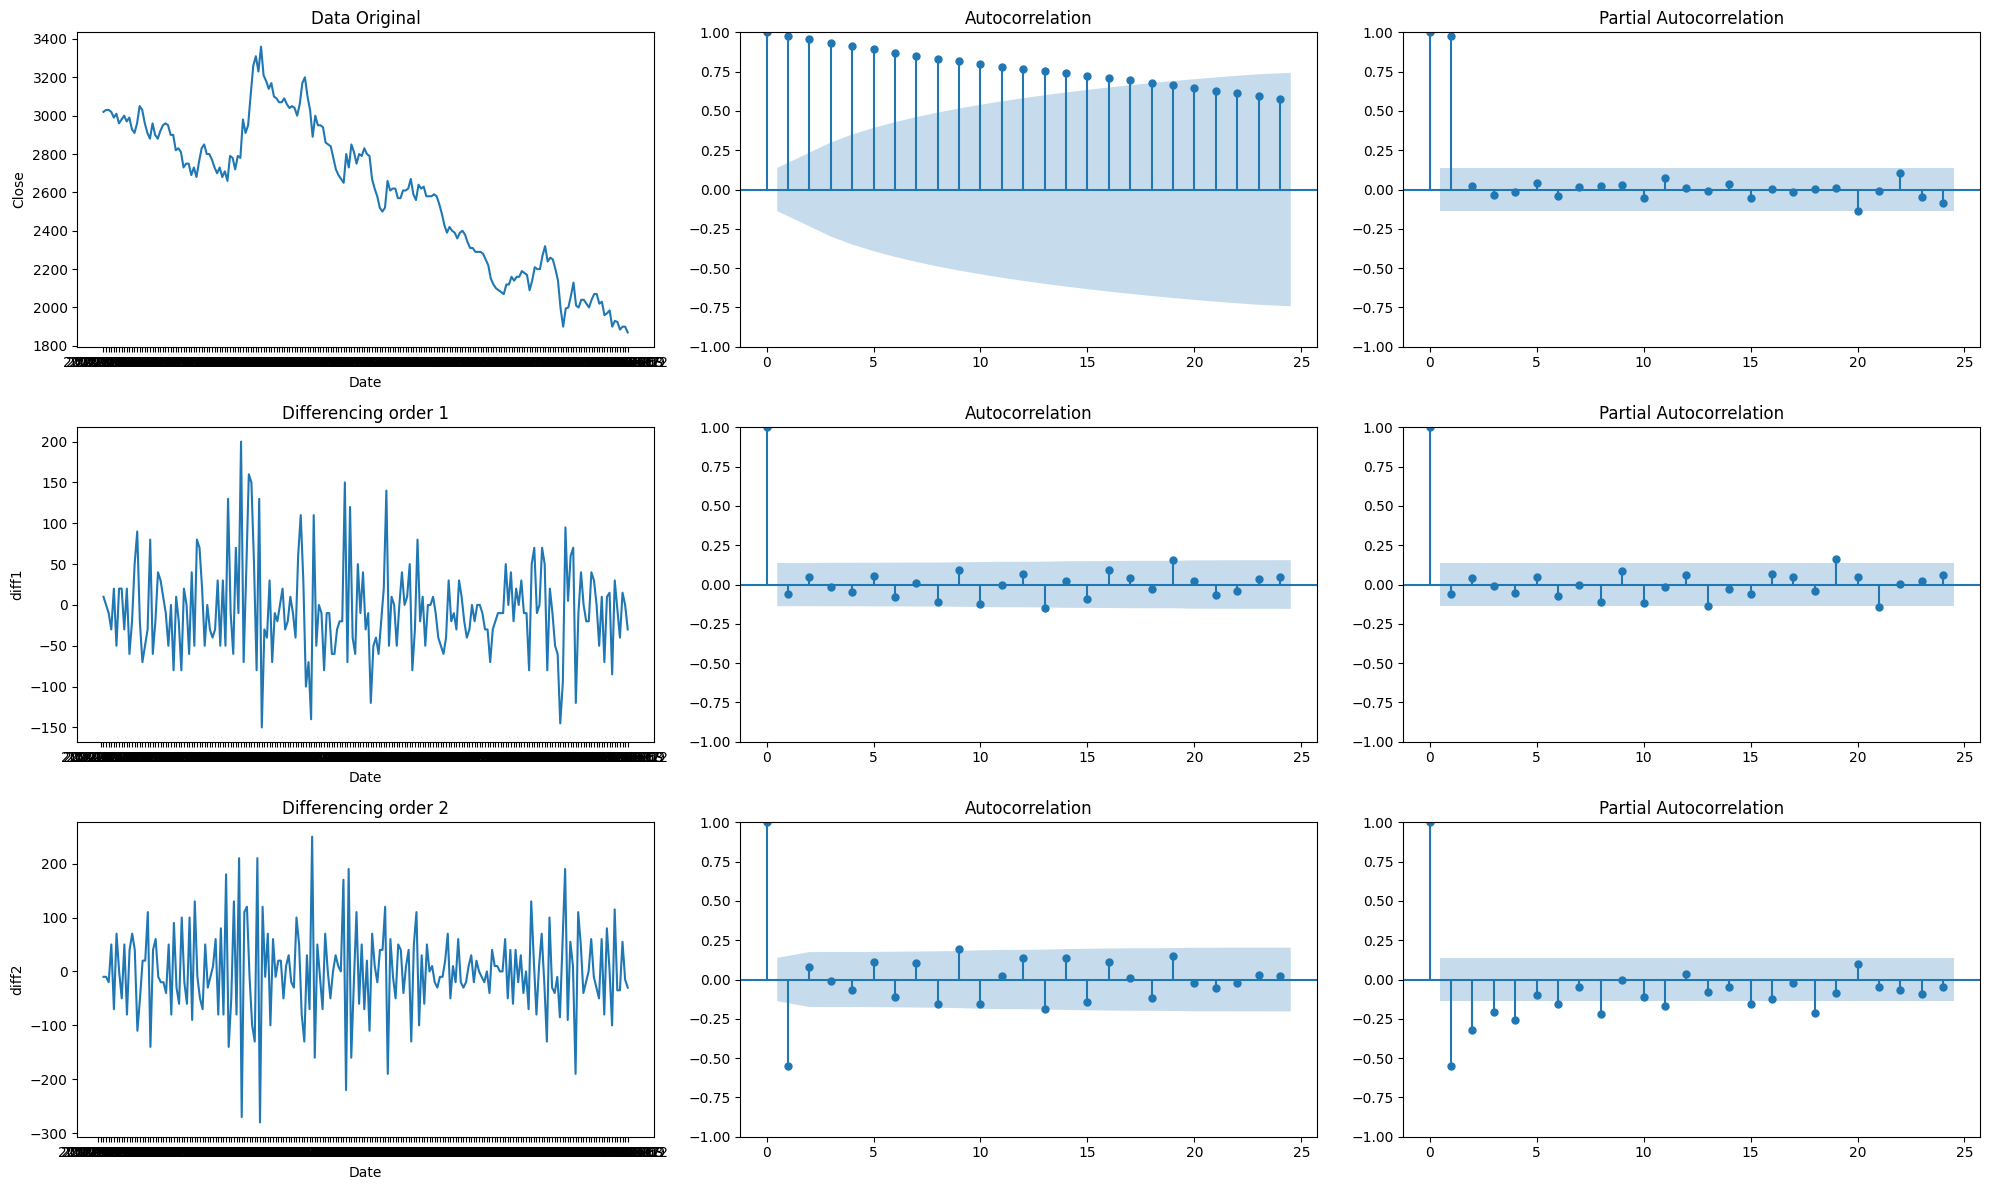

In [371]:
fig, ax = plt.subplots(3, 3, figsize=(20,12))

# Data Original
sns.lineplot(data=df_btps_split, x='Date', y='Close', ax=ax[0,0])
ax[0,0].set_title('Data Original')
plot_acf(df_btps_split['Close'], ax=ax[0,1])
plot_pacf(df_btps_split['Close'], ax=ax[0,2])

# Differencing order 1
sns.lineplot(data=df_btps_split, x='Date', y='diff1', ax=ax[1,0])
ax[1,0].set_title('Differencing order 1')
plot_acf(df_btps_split['diff1'].dropna(), ax=ax[1,1])
plot_pacf(df_btps_split['diff1'].dropna(), ax=ax[1,2])

# Differencing order 2
sns.lineplot(data=df_btps_split, x='Date', y='diff2', ax=ax[2,0])
ax[2,0].set_title('Differencing order 2')
plot_acf(df_btps_split['diff2'].dropna(), ax=ax[2,1])
plot_pacf(df_btps_split['diff2'].dropna(), ax=ax[2,2])

plt.tight_layout();

Pada differencing order 2, terlihat bahwa plot ACF cut-off, sedangkan plot PACF tail-off. Sehingga model yang digunakan adalah IMA(0,d,q). dikarenakan differencing yang digunakan adalah differencing order 2, maka model nya menjadi (0,2,q), dimana nilai MA(q) terbaik akan dicari melalui looping.

**Find Best MA**

In [372]:
MA = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]

list_aic_ima_split = []

for q in MA :

    # define model
    arima_ima_split = ARIMA(df_btps_split['Close'], order=(0,2,q))

    # fitting model
    model_arima_ima_split = arima_ima_split.fit()

    # evaluate (AIC)
    list_aic_ima_split.append(model_arima_ima_split.aic)

In [373]:
pd.DataFrame({
    'MA' : MA,
    'AIC' : list_aic_ima_split
}).sort_values(by='AIC', ascending=True).head()

,MA,AIC
0,1,2203.800652
1,2,2205.273817
2,3,2206.771689
3,4,2208.719624
4,5,2210.427159


Dari hasil looping, nilai MA terbaik adalah 1 sehingga didapatkan bahwa model terbaik yang digunakan yaitu IMA(0,2,1).

**Melihat Performa Model**

Untuk melihat performa model apakah akurat atau tidak, dapat dilakukan dengan membandingkan hasil forecasting selama 40 hari ke depan pada dataset split(dataset yang sudah dipotong 40 baris data terakhir) dengan dataset asli nya(dataset yang memiliki nilai aktual untuk 40 baris data terakhir hasil forecasting).

In [374]:
# berapa periode ke depan
forecast_length = 40

In [375]:
# membuat list berisikan tanggal yang akan digunakan sebagai label pada hasil prediksi
date = [tanggal for tanggal in df_btps.tail(40)['Date']]
date

['2023-06-13',
 '2023-06-14',
 '2023-06-15',
 '2023-06-16',
 '2023-06-19',
 '2023-06-20',
 '2023-06-21',
 '2023-06-22',
 '2023-06-23',
 '2023-06-26',
 '2023-06-27',
 '2023-07-03',
 '2023-07-04',
 '2023-07-05',
 '2023-07-06',
 '2023-07-07',
 '2023-07-10',
 '2023-07-11',
 '2023-07-12',
 '2023-07-13',
 '2023-07-14',
 '2023-07-17',
 '2023-07-18',
 '2023-07-20',
 '2023-07-21',
 '2023-07-24',
 '2023-07-25',
 '2023-07-26',
 '2023-07-27',
 '2023-07-28',
 '2023-07-31',
 '2023-08-01',
 '2023-08-02',
 '2023-08-03',
 '2023-08-04',
 '2023-08-07',
 '2023-08-08',
 '2023-08-09',
 '2023-08-10',
 '2023-08-11']

In [376]:
# melakukan prediksi harga saham 40 hari ke depan

# define model
ima_split = ARIMA(df_btps_split['Close'], order=(0,2,1))

# fitting model
model_ima_split = ima_split.fit()

# hasil forecast (predict)
forecast_result_ima_split = model_ima_split.forecast(forecast_length)
forecast_result_ima_split

204    1864.332031
205    1858.664062
206    1852.996093
207    1847.328124
208    1841.660154
209    1835.992185
210    1830.324216
211    1824.656247
212    1818.988278
213    1813.320309
214    1807.652340
215    1801.984371
216    1796.316401
217    1790.648432
218    1784.980463
219    1779.312494
220    1773.644525
221    1767.976556
222    1762.308587
223    1756.640618
224    1750.972648
225    1745.304679
226    1739.636710
227    1733.968741
228    1728.300772
229    1722.632803
230    1716.964834
231    1711.296865
232    1705.628896
233    1699.960926
234    1694.292957
235    1688.624988
236    1682.957019
237    1677.289050
238    1671.621081
239    1665.953112
240    1660.285143
241    1654.617173
242    1648.949204
243    1643.281235
Name: predicted_mean, dtype: float64

In [377]:
# membuat dataframe yang berisikan tanggal dan hasil prediksi
df_forecast_ima_split = pd.DataFrame({
    'Date' : date,
    'Close': forecast_result_ima_split
})
df_forecast_ima_split

,Date,Close
204,2023-06-13,1864.332031
205,2023-06-14,1858.664062
206,2023-06-15,1852.996093
207,2023-06-16,1847.328124
208,2023-06-19,1841.660154
209,2023-06-20,1835.992185
210,2023-06-21,1830.324216
211,2023-06-22,1824.656247
212,2023-06-23,1818.988278
213,2023-06-26,1813.320309


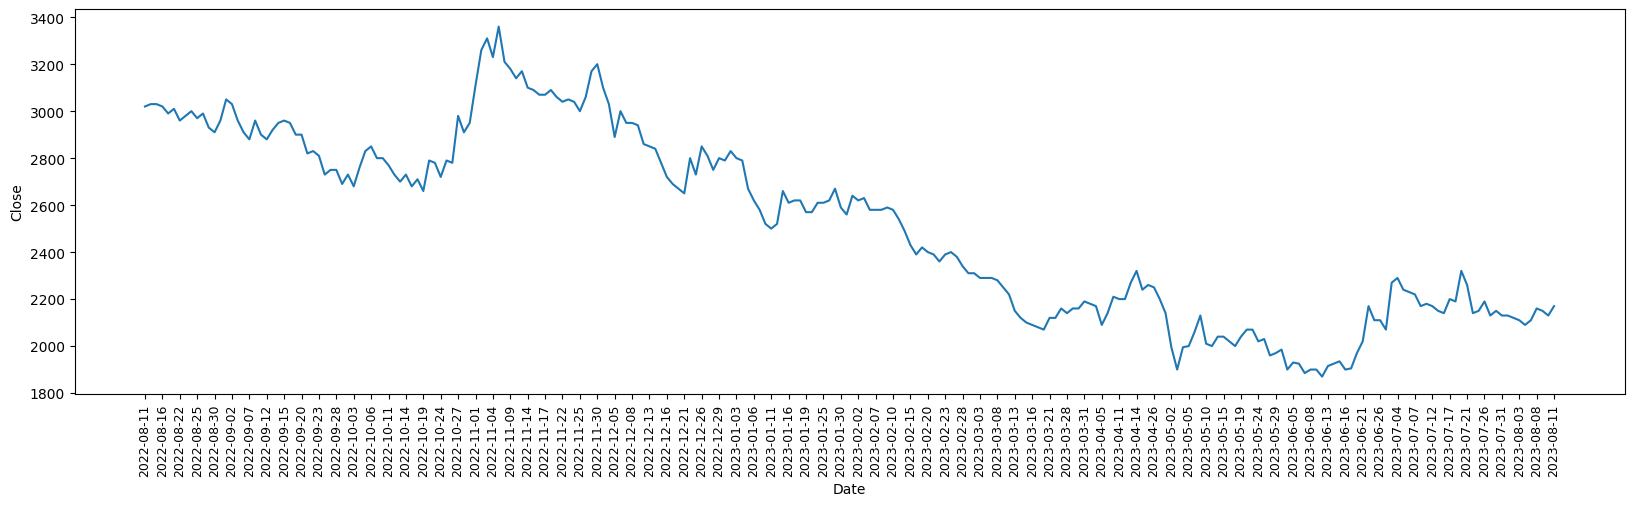

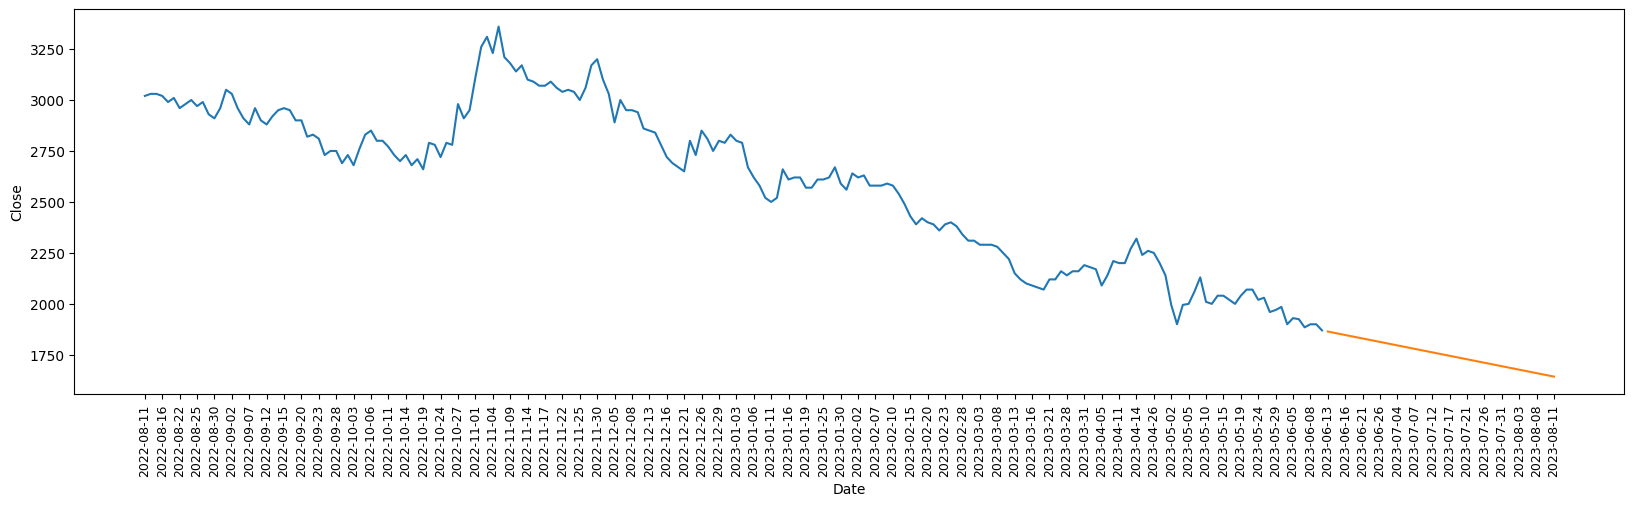

In [378]:
# plot aktual vs hasil prediksi
plt.figure(figsize=(20,5))
sns.lineplot(data=df_btps, x='Date', y='Close')
plt.xticks(range(0,246,3), rotation=90, fontsize=9)
plt.show()

plt.figure(figsize=(20,5))
sns.lineplot(data=df_btps_split, x='Date', y='Close')
sns.lineplot(data=df_forecast_ima_split, x='Date', y='Close')
plt.xticks(range(0,246,3), rotation=90, fontsize=9)
plt.show()

Terlihat bahwa dari hasil prediksi dengan data yang sedikit menghasilkan model yang tidak akurat namun dengan tingkat error yang masih dapat ditoleransi (tidak terlalu tinggi). Selanjutnya, kita akan mencoba menggunakan jumlah data yang lebih banyak apakah berpengaruh terhadap model.

**Load Dataset Historis Harga Saham Bank Tabungan Pensiunan Syariah (BTPS) 08 May 2018 - 11 Aug 2023 (Banyak Data)**

In [379]:
df_btps2 = pd.read_csv("BTPS2.JK.csv")
df_btps2

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-05-08,1250.0,1460.0,1200.0,1460.0,1329.273315,74480800.0
1,2018-05-09,1500.0,1540.0,1460.0,1470.0,1338.378052,22920200.0
2,2018-05-10,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-11,1470.0,1515.0,1470.0,1510.0,1374.796265,43286000.0
4,2018-05-14,1510.0,1515.0,1495.0,1505.0,1370.244141,16091400.0
...,...,...,...,...,...,...,...
1300,2023-08-04,2120.0,2160.0,2090.0,2090.0,2090.000000,16631700.0
1301,2023-08-07,2100.0,2130.0,2090.0,2110.0,2110.000000,10010100.0
1302,2023-08-08,2120.0,2180.0,2110.0,2160.0,2160.000000,10886100.0
1303,2023-08-09,2160.0,2180.0,2140.0,2150.0,2150.000000,12774500.0


In [380]:
# mengecek missing values
df_btps2.isna().sum()

Date         0
Open         2
High         2
Low          2
Close        2
Adj Close    2
Volume       2
dtype: int64

In [381]:
# melakukan drop terhadap missing values
df_btps2 = df_btps2.dropna()
df_btps2

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-05-08,1250.0,1460.0,1200.0,1460.0,1329.273315,74480800.0
1,2018-05-09,1500.0,1540.0,1460.0,1470.0,1338.378052,22920200.0
3,2018-05-11,1470.0,1515.0,1470.0,1510.0,1374.796265,43286000.0
4,2018-05-14,1510.0,1515.0,1495.0,1505.0,1370.244141,16091400.0
5,2018-05-15,1505.0,1505.0,1505.0,1505.0,1370.244141,0.0
...,...,...,...,...,...,...,...
1300,2023-08-04,2120.0,2160.0,2090.0,2090.0,2090.000000,16631700.0
1301,2023-08-07,2100.0,2130.0,2090.0,2110.0,2110.000000,10010100.0
1302,2023-08-08,2120.0,2180.0,2110.0,2160.0,2160.000000,10886100.0
1303,2023-08-09,2160.0,2180.0,2140.0,2150.0,2150.000000,12774500.0


In [382]:
# mengecek kembali missing values
df_btps2.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

**Data Spitting**

In [383]:
# split data, dengan melakukan drop pada 40 data terakhir
df_btps2_split = df_btps2
for i in range(1265,1305):
    df_btps2_split = df_btps2_split.drop(i)

In [384]:
# data hasil splitting
df_btps2_split

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-05-08,1250.0,1460.0,1200.0,1460.0,1329.273315,74480800.0
1,2018-05-09,1500.0,1540.0,1460.0,1470.0,1338.378052,22920200.0
3,2018-05-11,1470.0,1515.0,1470.0,1510.0,1374.796265,43286000.0
4,2018-05-14,1510.0,1515.0,1495.0,1505.0,1370.244141,16091400.0
5,2018-05-15,1505.0,1505.0,1505.0,1505.0,1370.244141,0.0
...,...,...,...,...,...,...,...
1260,2023-06-05,1910.0,1965.0,1900.0,1930.0,1930.000000,27623400.0
1261,2023-06-06,1950.0,1950.0,1905.0,1925.0,1925.000000,24020500.0
1262,2023-06-07,1950.0,1950.0,1865.0,1885.0,1885.000000,50055900.0
1263,2023-06-08,1885.0,1935.0,1885.0,1900.0,1900.000000,29076600.0


**Plot Data Awal Sebelum Splitting dengan Data Setelah Dilakukan Splitting** 

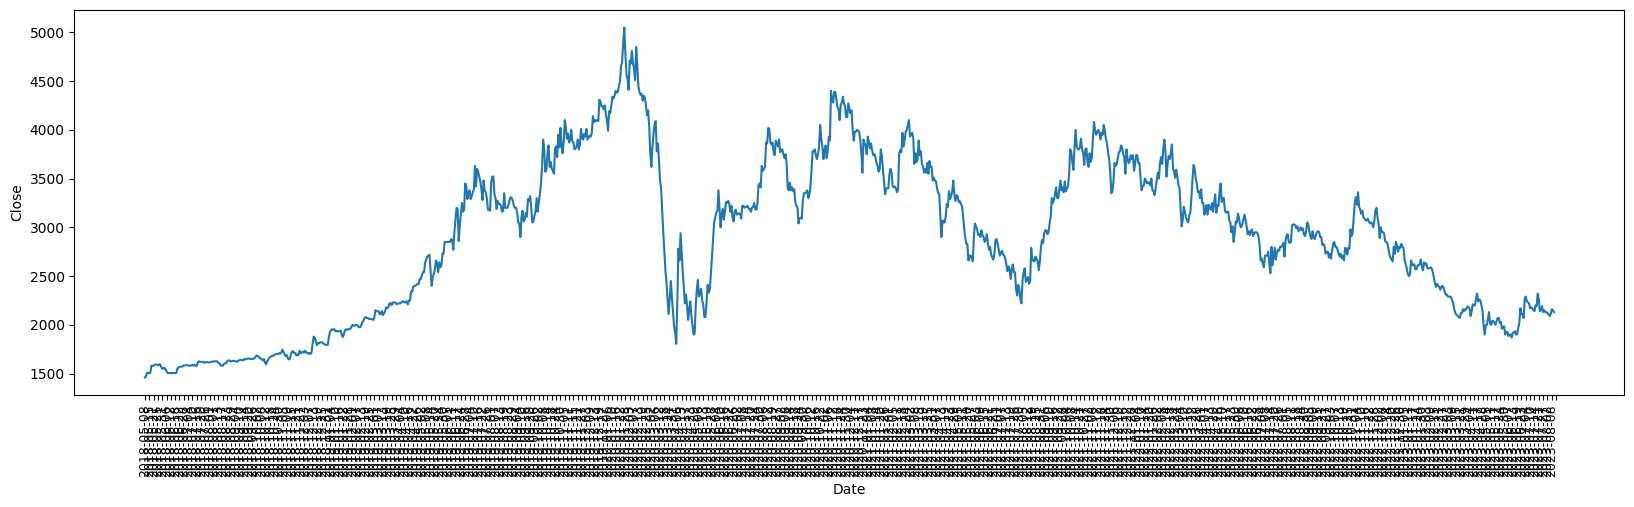

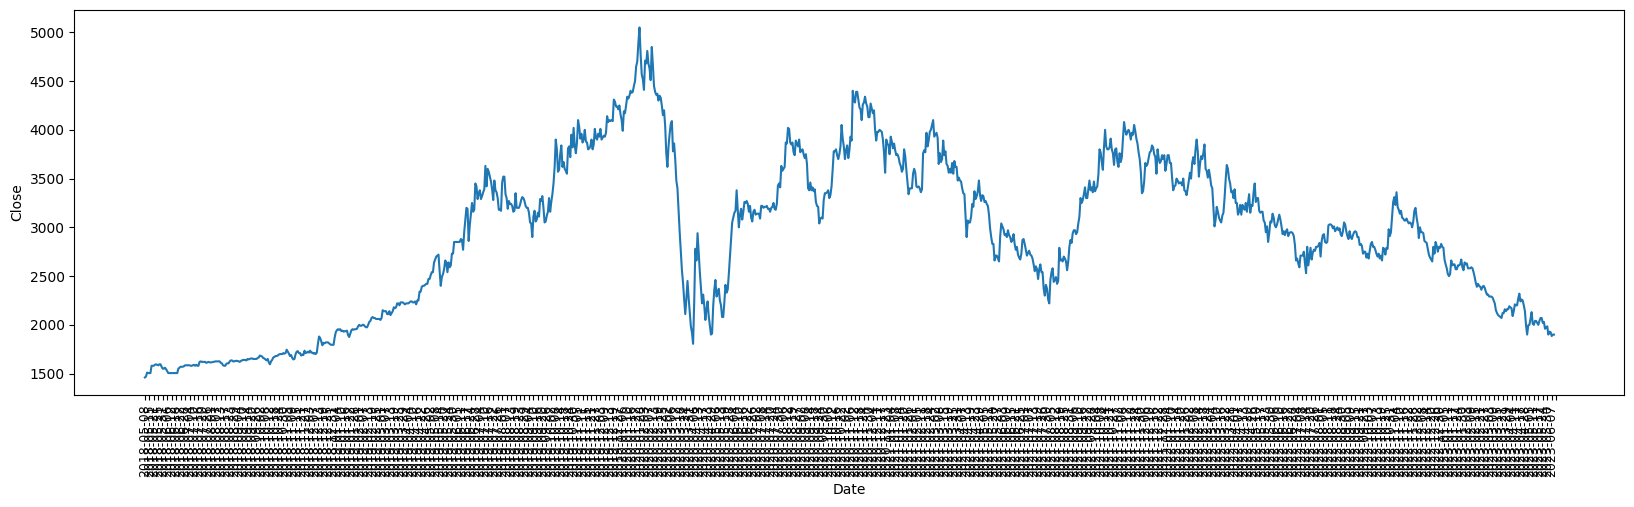

In [385]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df_btps2, x='Date', y='Close')
plt.xticks(range(0,1308,4), rotation=90, fontsize=9) 
plt.show()

plt.figure(figsize=(20,5))
sns.lineplot(data=df_btps2_split, x='Date', y='Close')
plt.xticks(range(0,1268,4), rotation=90, fontsize=9) 
plt.show()

**Cek Stationarity Menggunakan Adfuller Test**

Hypothesis
- Ho : data tidak stationer
- Ha : data stationer

In [386]:
pvalue = adfuller(df_btps2_split['Close'])[1]

alpha = 0.05

if pvalue <= alpha:
    print('Reject null hypothesis, The data is stationary')
else:
    print('Failed to reject null hypothesis, The data is not stationary')

Failed to reject null hypothesis, The data is not stationary


**ACF-PACF**

Kita perlu untuk melakukan plot ACF-PACF dengan tujuan sebagaimana berikut :
- untuk menentukan data stationer atau tidak (Apabila grafik ACF slowly decaying, artinya data tidak stationer)
- untuk menentukan parameter ARIMA (p,d,q) terbaik

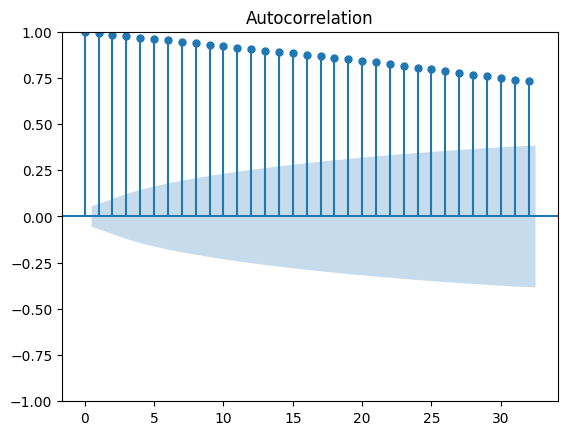

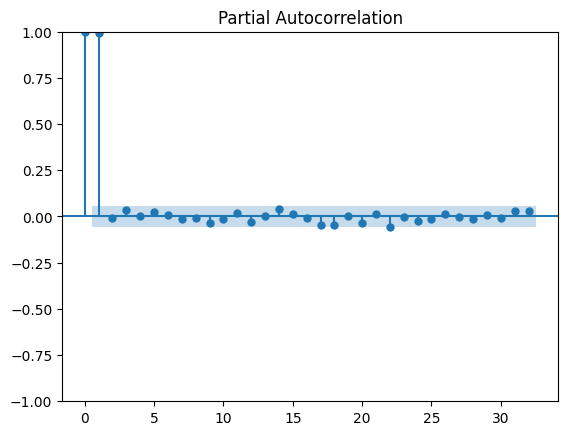

In [387]:
plot_acf(df_btps2_split['Close'])
plt.show()

plot_pacf(df_btps2_split['Close'])
plt.show()

Plot ACF menunjukkan kecenderungan slowly decaying, sehingga perlu dilakukan differencing.

**Differencing**

In [388]:
# membuat kolom baru berisikan nilai differencing 1
df_btps2_split['diff1'] = df_btps2_split['Close'].diff()
df_btps2_split.head()

,Date,Open,High,Low,Close,Adj Close,Volume,diff1
0,2018-05-08,1250.0,1460.0,1200.0,1460.0,1329.273315,74480800.0,NaN
1,2018-05-09,1500.0,1540.0,1460.0,1470.0,1338.378052,22920200.0,10.0
3,2018-05-11,1470.0,1515.0,1470.0,1510.0,1374.796265,43286000.0,40.0
4,2018-05-14,1510.0,1515.0,1495.0,1505.0,1370.244141,16091400.0,-5.0
5,2018-05-15,1505.0,1505.0,1505.0,1505.0,1370.244141,0.0,0.0


In [389]:
# membuat kolom baru berisikan nilai differencing 2
df_btps2_split['diff2'] = df_btps2_split['Close'].diff().diff()
df_btps2_split.head()

,Date,Open,High,Low,Close,Adj Close,Volume,diff1,diff2
0,2018-05-08,1250.0,1460.0,1200.0,1460.0,1329.273315,74480800.0,NaN,NaN
1,2018-05-09,1500.0,1540.0,1460.0,1470.0,1338.378052,22920200.0,10.0,NaN
3,2018-05-11,1470.0,1515.0,1470.0,1510.0,1374.796265,43286000.0,40.0,30.0
4,2018-05-14,1510.0,1515.0,1495.0,1505.0,1370.244141,16091400.0,-5.0,-45.0
5,2018-05-15,1505.0,1505.0,1505.0,1505.0,1370.244141,0.0,0.0,5.0


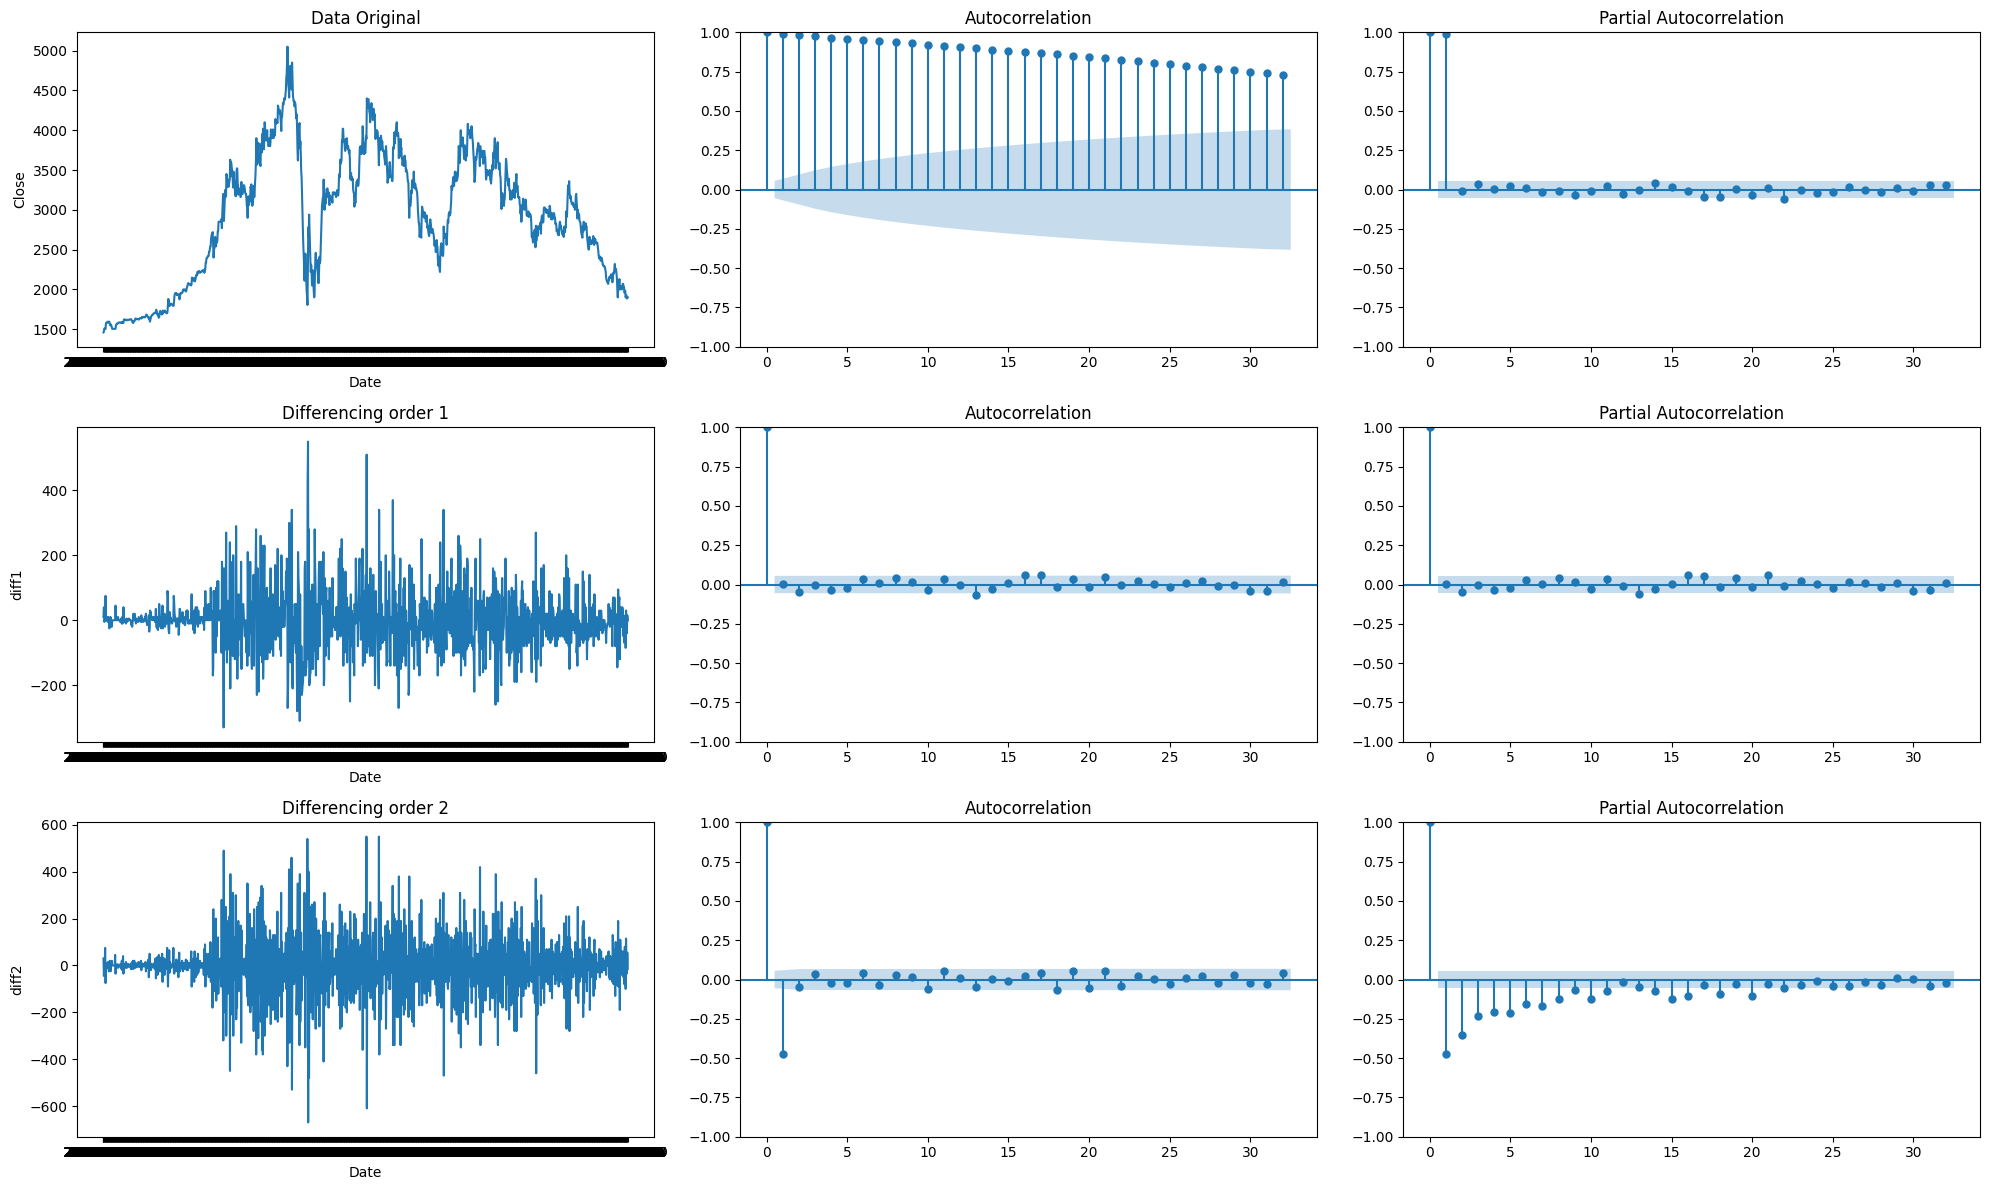

In [390]:
fig, ax = plt.subplots(3, 3, figsize=(20,12))

# Data Original
sns.lineplot(data=df_btps2_split, x='Date', y='Close', ax=ax[0,0])
ax[0,0].set_title('Data Original')
plot_acf(df_btps2_split['Close'], ax=ax[0,1])
plot_pacf(df_btps2_split['Close'], ax=ax[0,2])

# Differencing order 1
sns.lineplot(data=df_btps2_split, x='Date', y='diff1', ax=ax[1,0])
ax[1,0].set_title('Differencing order 1')
plot_acf(df_btps2_split['diff1'].dropna(), ax=ax[1,1])
plot_pacf(df_btps2_split['diff1'].dropna(), ax=ax[1,2])

# Differencing order 2
sns.lineplot(data=df_btps2_split, x='Date', y='diff2', ax=ax[2,0])
ax[2,0].set_title('Differencing order 2')
plot_acf(df_btps2_split['diff2'].dropna(), ax=ax[2,1])
plot_pacf(df_btps2_split['diff2'].dropna(), ax=ax[2,2])

plt.tight_layout();

Pada differencing order 2, terlihat bahwa plot ACF cut-off, sedangkan plot PACF tail-off. Sehingga model yang digunakan adalah IMA(0,d,q). dikarenakan differencing yang digunakan adalah differencing order 2, maka model nya menjadi (0,2,q), dimana nilai MA(q) terbaik akan dicari melalui looping.

**Find Best MA**

In [391]:
MA2 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]

list_aic_ima_split2 = []

for q in MA2 :

    # define model
    arima_ima_split2 = ARIMA(df_btps2_split['Close'], order=(0,2,q))

    # fitting model
    model_arima_ima_split2 = arima_ima_split2.fit()

    # evaluate (AIC)
    list_aic_ima_split2.append(model_arima_ima_split2.aic)

In [392]:
pd.DataFrame({
    'MA' : MA2,
    'AIC' : list_aic_ima_split2
}).sort_values(by='AIC', ascending=True).head()

,MA,AIC
0,1,14974.551314
2,3,14975.726817
1,2,14976.490090
3,4,14977.726395
4,5,14978.578546


Dari hasil looping, nilai MA terbaik adalah 1 sehingga didapatkan bahwa model terbaik yang digunakan yaitu IMA(0,2,1).

**Melihat Performa Model**

Sama seperti sebelumnya, untuk melihat performa model apakah akurat atau tidak, dapat dilakukan dengan membandingkan hasil forecasting selama 40 hari ke depan pada dataset split(dataset yang sudah dipotong 40 baris data terakhir) dengan dataset asli nya(dataset yang memiliki nilai aktual untuk 40 baris data terakhir hasil forecasting).

In [393]:
# berapa periode ke depan
forecast_length2 = 40

In [394]:
# membuat list berisikan tanggal yang akan digunakan sebagai label pada hasil prediksi
date2 = [tanggal for tanggal in df_btps2.tail(40)['Date']]
date2

['2023-06-12',
 '2023-06-13',
 '2023-06-14',
 '2023-06-15',
 '2023-06-16',
 '2023-06-19',
 '2023-06-20',
 '2023-06-21',
 '2023-06-22',
 '2023-06-23',
 '2023-06-26',
 '2023-06-27',
 '2023-07-03',
 '2023-07-04',
 '2023-07-05',
 '2023-07-06',
 '2023-07-07',
 '2023-07-10',
 '2023-07-11',
 '2023-07-12',
 '2023-07-13',
 '2023-07-14',
 '2023-07-17',
 '2023-07-18',
 '2023-07-20',
 '2023-07-21',
 '2023-07-24',
 '2023-07-25',
 '2023-07-26',
 '2023-07-27',
 '2023-07-28',
 '2023-07-31',
 '2023-08-01',
 '2023-08-02',
 '2023-08-03',
 '2023-08-04',
 '2023-08-07',
 '2023-08-08',
 '2023-08-09',
 '2023-08-10']

In [395]:
# melakukan prediksi harga saham 30 hari ke depan

# define model
ima_split2 = ARIMA(df_btps2_split['Close'], order=(0,2,1))

# fitting model
model_ima_split2 = ima_split2.fit()

# hasil forecast (predict)
forecast_result_ima_split2 = model_ima_split2.forecast(forecast_length2)
forecast_result_ima_split2

1263    1898.808831
1264    1897.617663
1265    1896.426494
1266    1895.235325
1267    1894.044157
1268    1892.852988
1269    1891.661819
1270    1890.470651
1271    1889.279482
1272    1888.088314
1273    1886.897145
1274    1885.705976
1275    1884.514808
1276    1883.323639
1277    1882.132470
1278    1880.941302
1279    1879.750133
1280    1878.558964
1281    1877.367796
1282    1876.176627
1283    1874.985458
1284    1873.794290
1285    1872.603121
1286    1871.411952
1287    1870.220784
1288    1869.029615
1289    1867.838446
1290    1866.647278
1291    1865.456109
1292    1864.264941
1293    1863.073772
1294    1861.882603
1295    1860.691435
1296    1859.500266
1297    1858.309097
1298    1857.117929
1299    1855.926760
1300    1854.735591
1301    1853.544423
1302    1852.353254
Name: predicted_mean, dtype: float64

In [396]:
# membuat dataframe yang berisikan tanggal dan hasil prediksi
df_forecast_ima_split2 = pd.DataFrame({
    'Date' : date2,
    'Close': forecast_result_ima_split2
})
df_forecast_ima_split2

,Date,Close
1263,2023-06-12,1898.808831
1264,2023-06-13,1897.617663
1265,2023-06-14,1896.426494
1266,2023-06-15,1895.235325
1267,2023-06-16,1894.044157
1268,2023-06-19,1892.852988
1269,2023-06-20,1891.661819
1270,2023-06-21,1890.470651
1271,2023-06-22,1889.279482
1272,2023-06-23,1888.088314


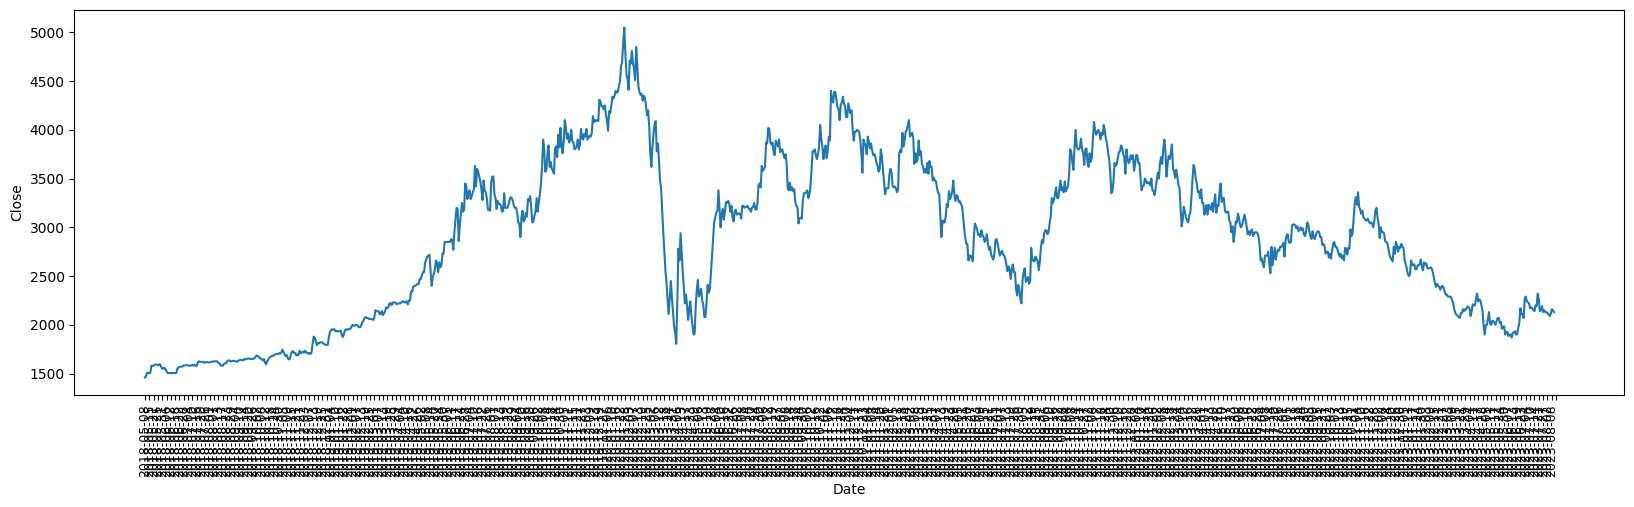

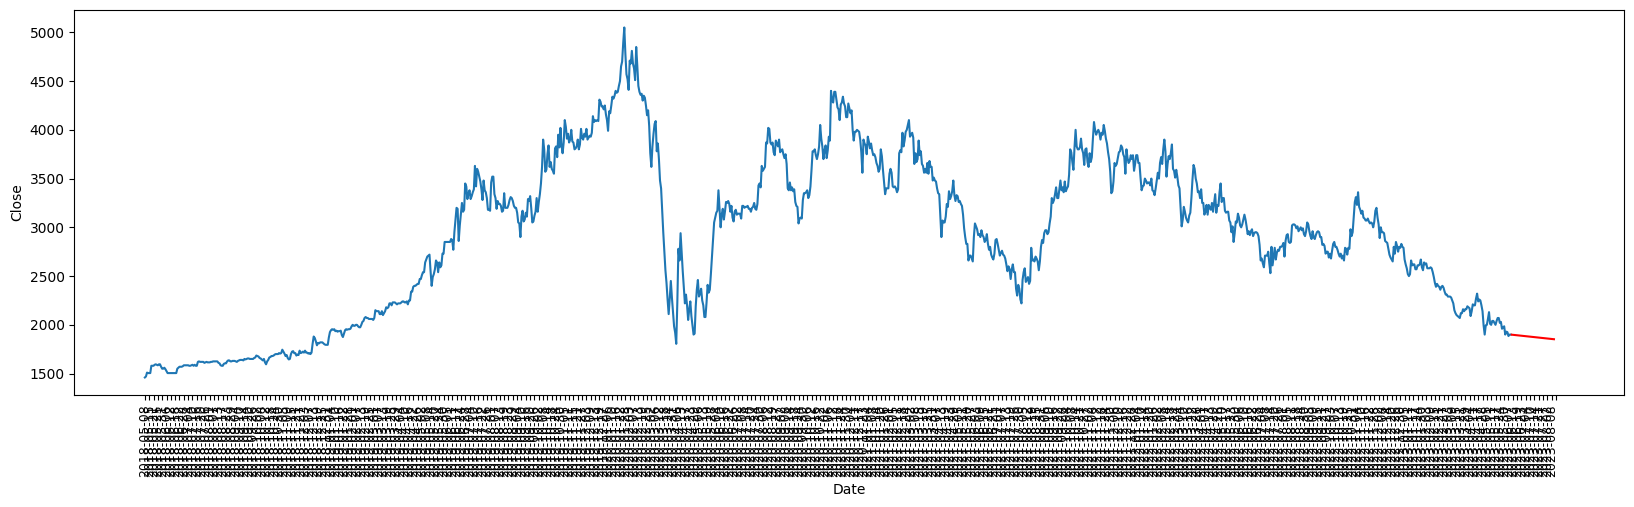

In [397]:
# Plot aktual vs hasil prediksi
plt.figure(figsize=(20,5))
sns.lineplot(data=df_btps2, x='Date', y='Close')
plt.xticks(range(0,1308,4), rotation=90, fontsize=9) 
plt.show()

plt.figure(figsize=(20,5))
sns.lineplot(data=df_btps2_split, x='Date', y='Close')
sns.lineplot(data=df_forecast_ima_split2, x='Date', y='Close', color='red')
plt.xticks(range(0,1308,4), rotation=90, fontsize=9) 
plt.show()

Dari hasil plot, terlihat bahwa tidak adanya perbedaan siginifikan terhadap performa model apabila saat menggunakan sedikit data maupun dengan saat menggunakan banyak data, keduanya sama-sama menghasilkan model yang buruk, dimana tidak dapat memprediksi pergerakan harga saham dengan benar.

**Kesimpulan**

Setelah kita melakukan pengujian performa model melalui hasil plot, dapat diambil kesimpulan sebagaimana berikut :
- Time Series Forecasting menggunakan model ARIMA tidak cukup baik apabila digunakan untuk membantu memprediksi harga saham dikarenakan dari hasil plot sangat terlihat jelas bahwa garis hasil prediksi melenceng sangat jauh dari pergerakan harga saham yang sebenarnya.
- Pada Time Series Forecasting menggunakan model ARIMA, menggunakan sedikit maupun banyak data tidak berpengaruh signifikan terhadap performa model, karena terlihat bahwa saat menggunakan banyak data model tetap masih tidak mampu untuk memprediksi pergerakan harga saham dengan benar.

**Rekomendasi**

Dari hasil kesimpulan, didapatkan rekomendasi sebagaimana berikut :
- Hindari untuk menggunakan model ARIMA saat ingin mencoba memprediksi pergerakan harga saham menggunakan bantuan Time-Series Forecasting.
- Kedepannya bisa dilakukan pengujian menggunakan model lain seperti EWMA(Exponential Smoothing), Dynamic Regression, ataupun LSTM(Long Short Term Memory) apakah tetap menghasilkan model yang buruk ketika digunakan untuk memprediksi pergerakan harga saham atau tidak.